<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 
Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Цель исследования
Построить модель с предельно большим значением *F1*-меры (минимум 0.59). Дополнительно измерить *AUC-ROC*, сравнить её значение с *F1*-мерой.

# Описание данных
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата
- `Exited` — факт ухода клиента

# Этапы исследования
1.  Подготовка данных
2.  Исследование задачи
3.  Борьба с дисбалансом
4.  Тестирование модели

## Подготовка данных

In [ ]:
# импортируем необходимые библиотеки

import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [ ]:
# сохраним данные в переменной data

data = pd.read_csv('***')

In [ ]:
# посмотрим первые 5 строк таблицы

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
# посмотрим общую информацию по данным

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Есть пропуски в колонке `Tenure`.

In [ ]:
# посчитаем число пропусков

data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [ ]:
# посчитаем будликаты в данных

data.duplicated().sum()

0

In [ ]:
# посмотрим количетсво каждого уникального значения в Tenure

data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [ ]:
# общее описание данных

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Выбросов не видно.

In [ ]:
# посмотрим названия колонок

data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# обновим названия колонок

data.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']

In [ ]:
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
# узнаем уникальные значения стран

data['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

Подготовим данные для обучения. Применим прямую кодировку для перевода номинативных переменных (страны и пола) в категориальные.

In [ ]:
data_geo = pd.get_dummies(data['geography'], drop_first=True)

In [ ]:
data_gender = pd.get_dummies(data['gender'], drop_first=True)

In [ ]:
data_ordinal = pd.concat([data_geo, data_gender, 
                          data.drop(['geography','gender'], axis=1)], axis=1)

In [ ]:
data_ordinal.columns

Index(['Germany', 'Spain', 'Male', 'row_number', 'customer_id', 'surname',
       'credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [ ]:
data_ordinal.columns = ['germany', 'spain', 'male', 'row_number',
       'customer_id', 'surname', 'credit_score', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited']

In [ ]:
data_ordinal.head()

,germany,spain,male,row_number,customer_id,surname,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,0,0,0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1
1,0,1,0,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0
2,0,0,0,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1
3,0,0,0,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0
4,0,1,0,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
# удалим ненужные для обучения колонки

data_ordinal = data_ordinal.drop(['surname', 'customer_id', 'row_number'], axis=1)

In [ ]:
data_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   germany           10000 non-null  uint8  
 1   spain             10000 non-null  uint8  
 2   male              10000 non-null  uint8  
 3   credit_score      10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            9091 non-null   float64
 6   balance           10000 non-null  float64
 7   num_of_products   10000 non-null  int64  
 8   has_cr_card       10000 non-null  int64  
 9   is_active_member  10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


**Выводы**

В данных есть пропуски в колонке с числом лет, сколько человек является клиентом банка (почти 10%). Для подготовки к обучению сделали прямое кодирование таких признаков, как страна и пол. Удалили ненужные для обучения колонки: фамилия, номер строки в данных, id клиента.

## Исследование задачи

Изучим баланс классов.

In [ ]:
data_ordinal['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [ ]:
7963/(7963+2037)

0.7963

In [ ]:
round(7963/2037)

4

Тех, кто ушел, почти в 4 раза меньше, чем тех, кто остался.

In [ ]:
# посмотрим на комплексный отчет по данным

ProfileReport(data_ordinal)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Разделим данные на тренировочную, валидационную и тестовую выборки в классическом соотношении 3:1:1.

In [ ]:
train, test = train_test_split(data_ordinal, test_size=0.4, 
                               random_state=12345, stratify=data_ordinal['exited'])

In [ ]:
train.shape, test.shape

((6000, 12), (4000, 12))

In [ ]:
test, valid = train_test_split(test, test_size=0.5, random_state=12345, stratify=test['exited'])

In [ ]:
test.shape, valid.shape

((2000, 12), (2000, 12))

In [ ]:
features_train = train.drop('exited', axis=1)
target_train = train['exited']

In [ ]:
features_valid = valid.drop('exited', axis=1)
target_valid = valid['exited']

In [ ]:
features_test = test.drop('exited', axis=1)
target_test = test['exited']

Заполним пропуски в колонке `tenure` в тренировочной и валидационной выборках на медиану с группировкой по возрастной категории.

<AxesSubplot:>

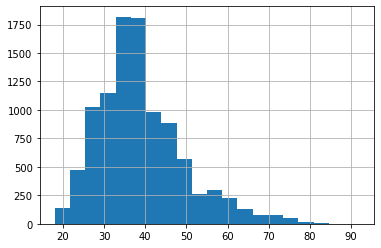

In [ ]:
# посмотрим еще на распределение возрастов в исходных данных

data['age'].hist(bins=20)

In [ ]:
# функция для определения возрастной категории

def age_group(age):
    if age <= 44:
        return 'young'
    elif age <= 59:
        return 'mature'
    elif age <= 74:
        return 'old'
    elif age <= 90:
        return 'very old'
    elif age >= 91:
        return 'long liver'

In [ ]:
features_train['age_group'] = features_train['age'].apply(age_group)

In [ ]:
for group in features_train['age_group'].unique():
    features_train.loc[(features_train['age_group']==group)\
     &(features_train['tenure'].isna()),'tenure'] = \
    features_train.loc[features_train['age_group']==group, 'tenure'].median()

In [ ]:
features_train.isna().sum()

germany             0
spain               0
male                0
credit_score        0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
age_group           0
dtype: int64

In [ ]:
features_valid['age_group'] = features_valid['age'].apply(age_group)

In [ ]:
# здесь важно, что заполняем пропуски медианами именно тренировочной выборки,
# т.к. модели будут обучаться именно на ней

for group in features_train['age_group'].unique():
    features_valid.loc[(features_valid['age_group']==group)\
     &(features_valid['tenure'].isna()),'tenure'] = \
    features_train.loc[features_train['age_group']==group, 'tenure'].median()

In [ ]:
features_valid.isna().sum()

germany             0
spain               0
male                0
credit_score        0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
age_group           0
dtype: int64

In [ ]:
features_train = features_train.drop('age_group', axis=1)

In [ ]:
features_valid = features_valid.drop('age_group', axis=1)

In [ ]:
features_train.head()

,germany,spain,male,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
2837,1,0,0,549,49,6.0,124829.16,1,0,1,93551.36
9925,0,0,0,694,38,5.0,195926.39,1,1,1,85522.84
8746,0,0,1,660,34,8.0,106486.66,2,0,1,182262.66
660,1,0,0,632,41,5.0,81877.38,1,1,1,33642.21
3610,0,0,0,580,56,1.0,131368.30,1,1,0,106918.67


In [ ]:
features_train.columns

Index(['germany', 'spain', 'male', 'credit_score', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary'],
      dtype='object')

In [ ]:
numeric = ['germany', 'spain', 'male', 'credit_score', 'age',
       'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary']

Масштабируем данные для дальнейшего обучения логистической регрессии.

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train)

StandardScaler()

In [ ]:
features_train_scaled = features_train[numeric]

In [ ]:
features_valid_scaled = features_valid[numeric]

In [ ]:
features_train_scaled[numeric] = scaler.transform(features_train_scaled[numeric])

In [ ]:
features_valid_scaled[numeric] = scaler.transform(features_valid_scaled[numeric])

### Исследование моделей

Для удобства исследования моделей для каждого алгоритма напишем функции, которые будут находить и показывать лучшие гиперпараметры, запонимать лучшую модель, строить графики зависимости F1 и ROC AUC от глубины на тренировочной и валидационной выборках, а также строить ROC-кривую для лучшей модели.

In [ ]:
# функция для дерева решения

def best_dt_finder(features_train, target_train, features_valid,\
                   target_valid, class_weight=None, title1='', title2=None):
    global best_model_dt
    best_model_dt = None
    best_f1 = 0
    best_roc_auc = 0
    best_depth = 0

    depth_list = []
    train_f1_list = []
    valid_f1_list = []
    train_roc_auc_list = []
    valid_roc_auc_list = []

    for max_depth in range(1, 10):
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=12345, class_weight=class_weight)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        
        f1 = f1_score(target_valid, predictions)
        f1_train = f1_score(target_train, model.predict(features_train))
        valid_f1_list.append(f1)
        train_f1_list.append(f1_train)
    
        roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
        roc_auc_train = roc_auc_score(target_train, model.predict_proba(features_train)[:, 1])
        valid_roc_auc_list.append(roc_auc)
        train_roc_auc_list.append(roc_auc_train)
    
        depth_list.append(max_depth)
        if f1 > best_f1:
            best_model_dt = model
            best_f1 = f1
            best_roc_auc = roc_auc
            best_depth = max_depth
    print('F1 лучшей модели на валидационной выборке:', best_f1)
    print('ROC AUC лучшей модели на валидационной выборке:', best_roc_auc)
    print('Глубина лучшей модели на валидационной выборке:', best_depth)
    
    fig, ax = plt.subplots()
    ax.plot(depth_list, train_f1_list, label = 'train_f1')
    ax.plot(depth_list, valid_f1_list, label = 'valid_f1')
    ax.plot(depth_list, train_roc_auc_list, label = 'train_roc_auc')
    ax.plot(depth_list, valid_roc_auc_list, label = 'valid_roc_auc')
    ax.legend()
    fig.set_figheight(5)
    fig.set_figwidth(8)
    plt.title(f'Зависимость F1 и ROC AUC от глубины на тренировочной и валидационной выборках {title1}')
    plt.show();
    
    fpr, tpr, thresholds = roc_curve(target_valid, best_model_dt.predict_proba(features_valid)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim(0,1) 
    plt.ylim(0,1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'ROC-кривая для {title2}')
    plt.show();

In [ ]:
# функция для случайного леса

def best_rf_finder(features_train, target_train, features_valid,\
                   target_valid, class_weight=None, title1='', title2=None):  
    global best_model_rf
    best_model_rf = None
    best_f1 = 0
    best_roc_auc = 0
    best_depth = 0
    best_n_est = 0

    depth_list = []
    train_f1_list = []
    valid_f1_list = []
    train_roc_auc_list = []
    valid_roc_auc_list = []

    for max_depth in range(1, 15):
        for est in range(1, 50, 5):
            model = RandomForestClassifier(n_estimators=est, max_depth=max_depth, 
                                       random_state=12345, class_weight=class_weight)
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
    
            f1 = f1_score(target_valid, predictions)
            f1_train = f1_score(target_train, model.predict(features_train))
            valid_f1_list.append(f1)
            train_f1_list.append(f1_train)
    
            roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
            roc_auc_train = roc_auc_score(target_train, model.predict_proba(features_train)[:, 1])
            valid_roc_auc_list.append(roc_auc)
            train_roc_auc_list.append(roc_auc_train)
    
            depth_list.append(max_depth)
            if f1 > best_f1:
                best_model_rf = model
                best_f1 = f1
                best_roc_auc = roc_auc
                best_depth = max_depth
                best_n_est = est
    print('F1 лучшей модели на валидационной выборке:', best_f1)
    print('ROC AUC лучшей модели на валидационной выборке:', best_roc_auc)
    print('Глубина лучшей модели на валидационной выборке:', best_depth)
    print('Число деревьев лучшей модели на валидационной выборке:', best_n_est)
    
    fig, ax = plt.subplots()
    ax.plot(depth_list, train_f1_list, label = 'train_f1')
    ax.plot(depth_list, valid_f1_list, label = 'valid_f1')
    ax.plot(depth_list, train_roc_auc_list, label = 'train_roc_auc')
    ax.plot(depth_list, valid_roc_auc_list, label = 'valid_roc_auc')
    ax.legend()
    fig.set_figheight(5)
    fig.set_figwidth(8)
    plt.title(f'Зависимость F1 и ROC AUC от глубины на тренировочной и валидационной выборках {title1}')
    plt.show();
    
    fpr, tpr, thresholds = roc_curve(target_valid, best_model_rf.predict_proba(features_valid)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim(0,1) 
    plt.ylim(0,1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'ROC-кривая для {title2}')
    plt.show();

In [ ]:
# функция для логистической регрессии

def log_reg(features_train, target_train, features_valid,\
                   target_valid, class_weight=None, title1=None):
    global model_lr
    model_lr = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
    model_lr.fit(features_train, target_train)
    f1 = f1_score(target_valid, model_lr.predict(features_valid))
    roc_auc = roc_auc_score(target_valid, model_lr.predict_proba(features_valid)[:, 1])
    print('F1 модели на валидационной выборке:', f1)
    print('ROC AUC модели на валидационной выборке:', roc_auc)
    
    fpr, tpr, thresholds = roc_curve(target_valid, model_lr.predict_proba(features_valid)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim(0,1) 
    plt.ylim(0,1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'ROC-кривая для {title1}')
    plt.show();

Теперь последовательно применим каждую функцию и обучим модели без учёта дисбаланса классов.

#### Дерево решений

F1 лучшей модели на валидационной выборке: 0.5520361990950227
ROC AUC лучшей модели на валидационной выборке: 0.8099802421836321
Глубина лучшей модели на валидационной выборке: 7


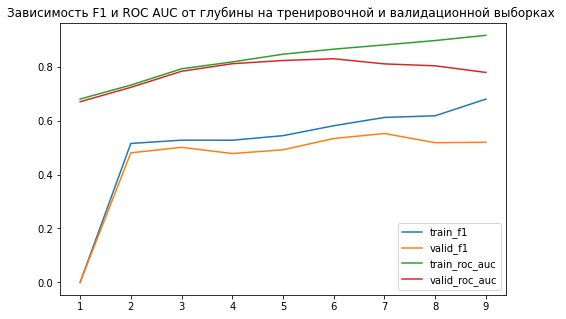

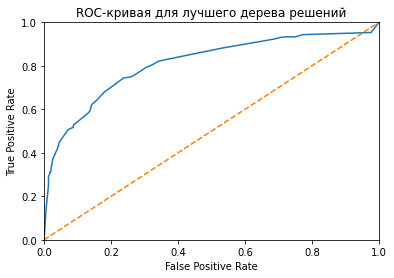

In [ ]:
best_dt_finder(features_train, target_train, features_valid,\
               target_valid, None, '', 'лучшего дерева решений')

#### Случайный лес

F1 лучшей модели на валидационной выборке: 0.5500794912559618
ROC AUC лучшей модели на валидационной выборке: 0.8608855388516405
Глубина лучшей модели на валидационной выборке: 10
Число деревьев лучшей модели на валидационной выборке: 41


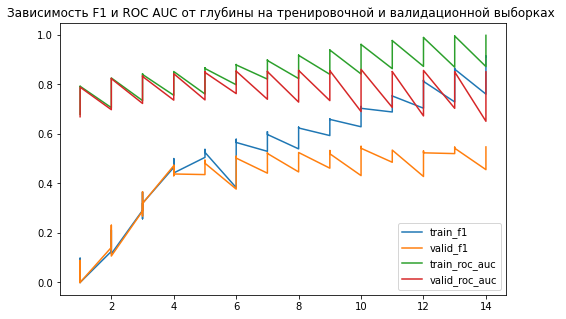

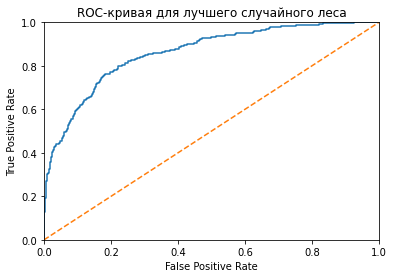

CPU times: user 22.3 s, sys: 138 ms, total: 22.4 s
Wall time: 22.4 s


In [ ]:
%%time

best_rf_finder(features_train, target_train, features_valid,\
               target_valid, None, '', 'лучшего случайного леса')

#### Логистическая регрессия

F1 модели на валидационной выборке: 0.2926829268292683
ROC AUC модели на валидационной выборке: 0.7504777504777504


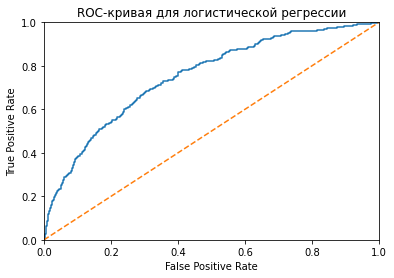

In [ ]:
log_reg(features_train_scaled, target_train, features_valid_scaled,\
        target_valid, None, 'логистической регрессии')

**Вывод**

В данных есть дисбаланс классов. Ушедших в 4 раза меньше, чем оставшихся. Без учета дисбаланса лучше всего себя показал случайный лес: F1 = 0.55; ROC AUC = 0.86. Хуже всех справилась логистическая регрессия: F1 = 0.29; ROC AUC = 0.75. Результаты неидеальны, до F1 = 0.59 еще не добрались.

## Борьба с дисбалансом

Подготовим увеличенную и уменьшенную выборки для того, чтобы справиться с дисбалансом классов.

**Увеличение выборки**

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [ ]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

**Уменьшение выборки**

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [ ]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Отдельно масштабируем данные для логистической регресии.

In [ ]:
features_upsampled_scaled = features_upsampled[numeric]

In [ ]:
features_upsampled_scaled[numeric] = scaler.transform(features_upsampled_scaled[numeric])

In [ ]:
features_downsampled_scaled = features_downsampled[numeric]

In [ ]:
features_downsampled_scaled[numeric] = scaler.transform(features_downsampled_scaled[numeric])

Теперь, когда новые выборки готовы, снова обучим модели, но теперь с учетом дисбаланса классов. 

### Дерево решений

Сначала применим взвешивание классов, а затем увеличенную и уменьшенную выборки для разных решающих деревьев.

**Взвешивание классов**

F1 лучшей модели на валидационной выборке: 0.5446265938069217
ROC AUC лучшей модели на валидационной выборке: 0.7910221469543502
Глубина лучшей модели на валидационной выборке: 7


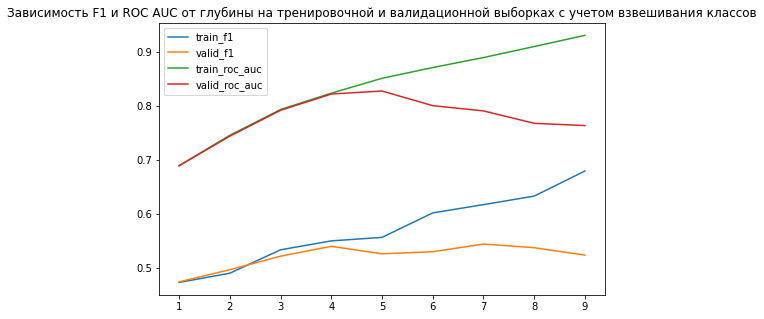

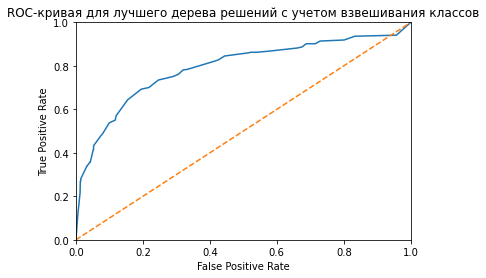

In [ ]:
best_dt_finder(features_train, target_train, features_valid,\
               target_valid, 'balanced', \
               'с учетом взвешивания классов', \
               'лучшего дерева решений с учетом взвешивания классов')

**Увеличение выборки**

F1 лучшей модели на валидационной выборке: 0.5456204379562044
ROC AUC лучшей модели на валидационной выборке: 0.7920347157635294
Глубина лучшей модели на валидационной выборке: 7


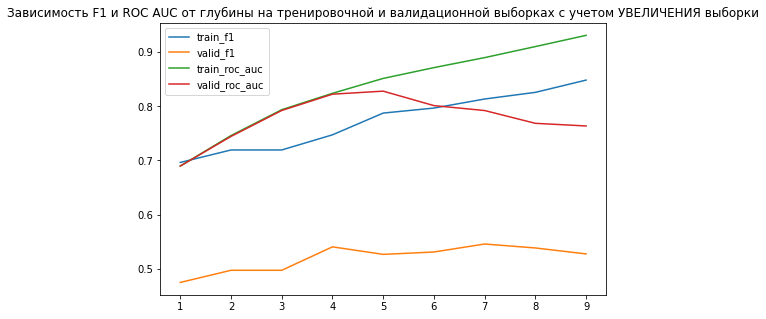

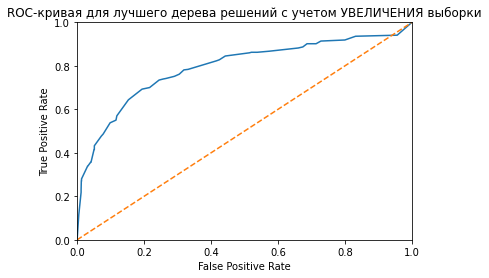

In [ ]:
best_dt_finder(features_upsampled, target_upsampled, features_valid,\
               target_valid, None, \
               'с учетом УВЕЛИЧЕНИЯ выборки', \
               'лучшего дерева решений с учетом УВЕЛИЧЕНИЯ выборки')

**Уменьшение выборки**

F1 лучшей модели на валидационной выборке: 0.5604606525911707
ROC AUC лучшей модели на валидационной выборке: 0.8213483128737367
Глубина лучшей модели на валидационной выборке: 6


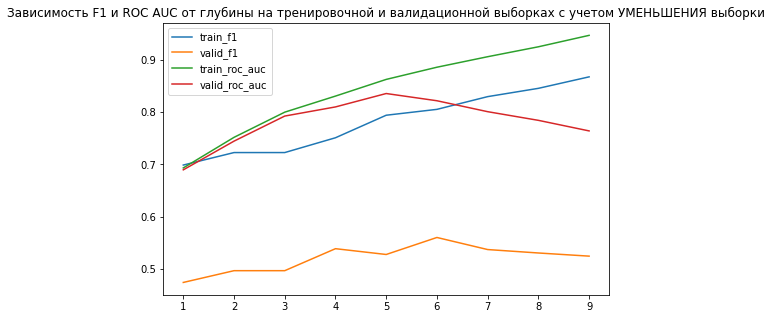

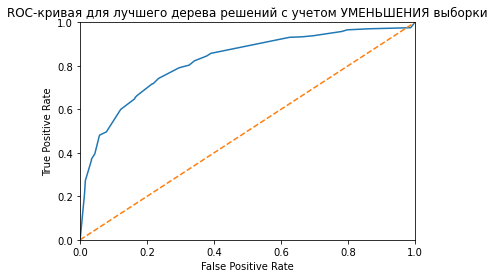

In [ ]:
best_dt_finder(features_downsampled, target_downsampled, features_valid,\
               target_valid, None, \
               'с учетом УМЕНЬШЕНИЯ выборки', \
               'лучшего дерева решений с учетом УМЕНЬШЕНИЯ выборки')

Лучший результат при обучении на уменьшенной выборке: F1 =  0.56, ROC AUC = 0.82.

### Случайный лес

**Взвешивание классов**

F1 лучшей модели на валидационной выборке: 0.6153846153846154
ROC AUC лучшей модели на валидационной выборке: 0.8529068359576832
Глубина лучшей модели на валидационной выборке: 8
Число деревьев лучшей модели на валидационной выборке: 21


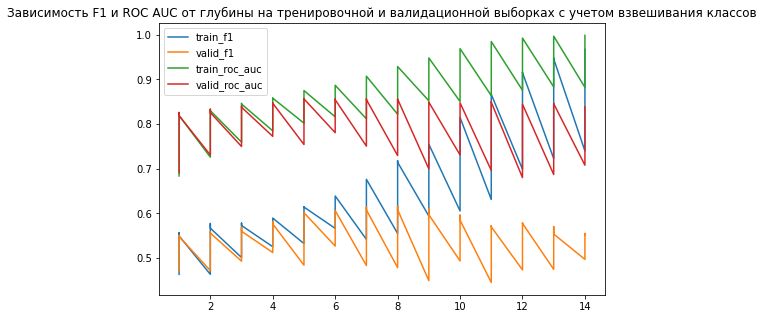

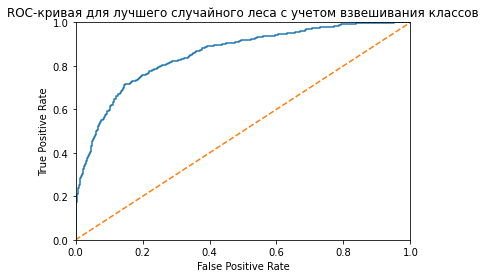

CPU times: user 22.6 s, sys: 131 ms, total: 22.7 s
Wall time: 22.7 s


In [ ]:
%%time

best_rf_finder(features_train, target_train, features_valid,\
               target_valid, 'balanced', 'с учетом взвешивания классов', \
               'лучшего случайного леса с учетом взвешивания классов')

**Увеличение выборки**

F1 лучшей модели на валидационной выборке: 0.6190476190476191
ROC AUC лучшей модели на валидационной выборке: 0.8561674154894493
Глубина лучшей модели на валидационной выборке: 9
Число деревьев лучшей модели на валидационной выборке: 36


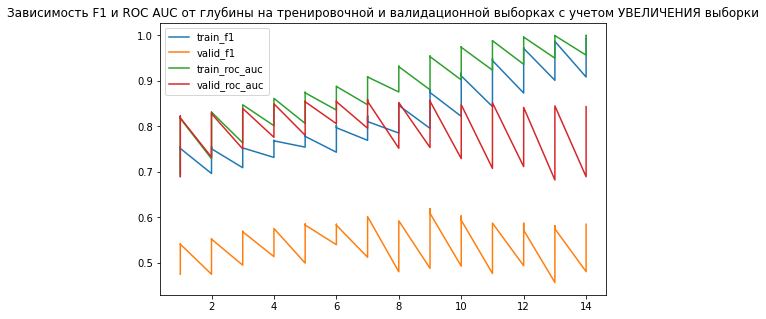

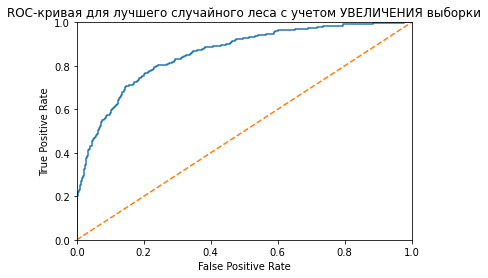

CPU times: user 32.7 s, sys: 115 ms, total: 32.8 s
Wall time: 32.8 s


In [ ]:
%%time

best_rf_finder(features_upsampled, target_upsampled, features_valid,\
               target_valid, None, 'с учетом УВЕЛИЧЕНИЯ выборки',\
               'лучшего случайного леса с учетом УВЕЛИЧЕНИЯ выборки')

**Уменьшение выборки**

F1 лучшей модели на валидационной выборке: 0.5954198473282443
ROC AUC лучшей модели на валидационной выборке: 0.8514338683830209
Глубина лучшей модели на валидационной выборке: 9
Число деревьев лучшей модели на валидационной выборке: 41


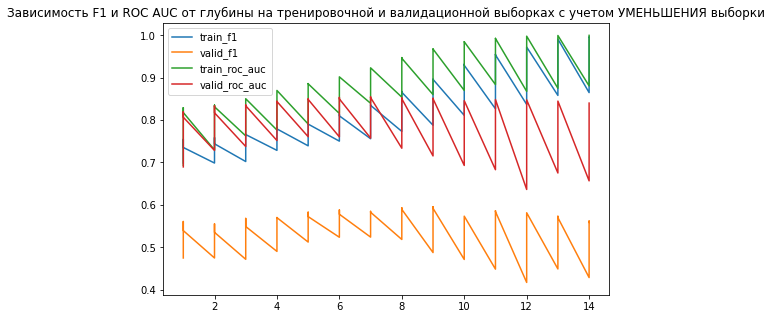

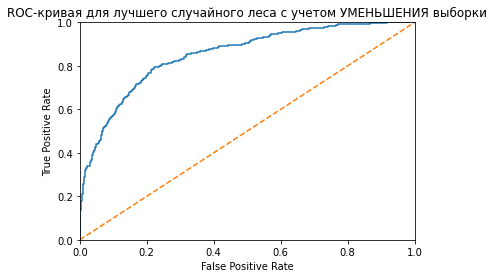

CPU times: user 16.3 s, sys: 138 ms, total: 16.5 s
Wall time: 16.8 s


In [ ]:
%%time

best_rf_finder(features_downsampled, target_downsampled, features_valid,\
               target_valid, None, 'с учетом УМЕНЬШЕНИЯ выборки',\
               'лучшего случайного леса с учетом УМЕНЬШЕНИЯ выборки')

### Логистическая регрессия

**Взвешивание классов**

F1 модели на валидационной выборке: 0.2926829268292683
ROC AUC модели на валидационной выборке: 0.7504777504777504


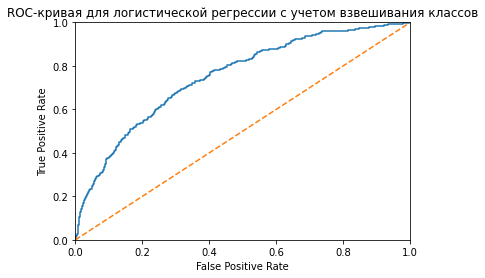

In [ ]:
log_reg(features_train_scaled, target_train, features_valid_scaled,\
        target_valid, 'balanced', 'логистической регрессии с учетом взвешивания классов')

**Увеличение выборки**

F1 модели на валидационной выборке: 0.47822374039282667
ROC AUC модели на валидационной выборке: 0.7541563134783474


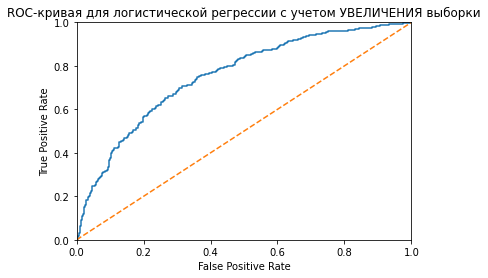

In [ ]:
log_reg(features_upsampled_scaled, target_upsampled, features_valid_scaled,\
        target_valid, None, 'логистической регрессии с учетом УВЕЛИЧЕНИЯ выборки')

**Уменьшение выборки**

F1 модели на валидационной выборке: 0.4791133844842284
ROC AUC модели на валидационной выборке: 0.7520633113853452


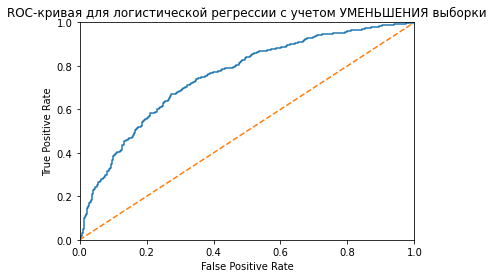

In [ ]:
log_reg(features_downsampled_scaled, target_downsampled, features_valid_scaled,\
        target_valid, None, 'логистической регрессии с учетом УМЕНЬШЕНИЯ выборки')

**Вывод**

Лучшие F1 = 0.62 и ROC AUC = 0.85 у случайного леса, обученнего на увеличенной выборке. Логистическая регрессия снова отстает от всех остальных моделей.

## Тестирование модели

Протестируем лучшую модель на тестовой выборке. Объединим **тренировочную увеличенную** и валидационную выборки для большего объема данных для обучения.

In [ ]:
features_train = pd.concat([features_upsampled, features_valid], ignore_index=True)

In [ ]:
target_train = pd.concat([target_upsampled, target_valid], ignore_index=True)

In [ ]:
features_train['age_group'] = features_train['age'].apply(age_group)

In [ ]:
features_test['age_group'] = features_test['age'].apply(age_group)

In [ ]:
# заполним пропуски колонки tenure в тестовой выборке
# медианой из новой тренировочной выборки 
# с учетом возрастной группы

for group in features_train['age_group'].unique():
    features_test.loc[(features_test['age_group']==group)\
     &(features_test['tenure'].isna()),'tenure'] = \
    features_train.loc[features_train['age_group']==group, 'tenure'].median()

In [ ]:
features_train = features_train.drop('age_group', axis=1)

In [ ]:
features_test = features_test.drop('age_group', axis=1)

F1 лучшей модели на тестовой выборке: 0.6320541760722348
ROC AUC лучшей модели на тестовой выборке: 0.8724012217952509


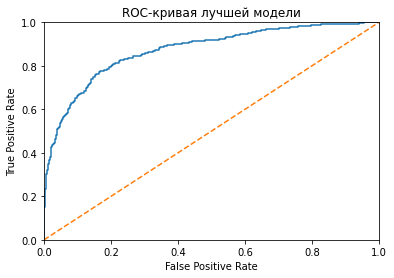

In [ ]:
# обучим лучшую модель с лучшими гиперпараметрами,
# протестируем ее на тестовой выборке,
# посчитаем ее F1 и ROC AUC,
# и построим ROC-кривую

best_model_rf = RandomForestClassifier(n_estimators=36, max_depth=9, random_state=12345)
best_model_rf.fit(features_train, target_train)
predictions_test = best_model_rf.predict(features_test)
probabilities_test = best_model_rf.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
f1 = f1_score(target_test, predictions_test)
roc_auc = roc_auc_score(target_test, probabilities_one_test)
print('F1 лучшей модели на тестовой выборке:', f1)
print('ROC AUC лучшей модели на тестовой выборке:', roc_auc)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim(0,1) 
plt.ylim(0,1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC-кривая лучшей модели')
plt.show();

<AxesSubplot:>

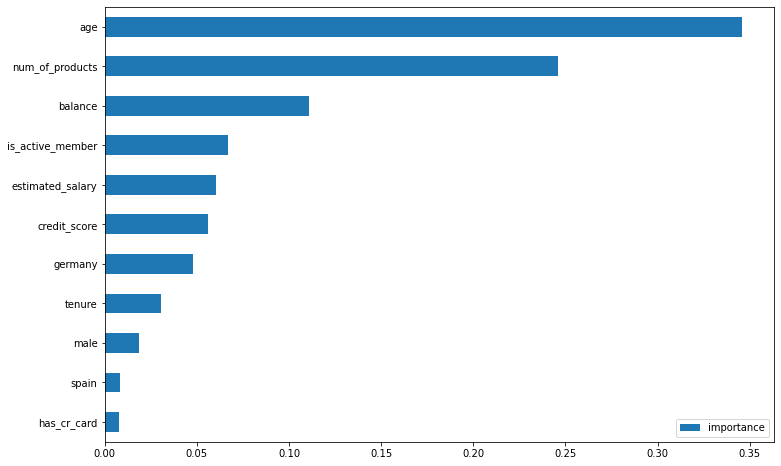

In [ ]:
# посмотрим на важность признаков

imp = pd.DataFrame(best_model_rf.feature_importances_, index=features_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

**Вывод**

Лучшая модель случайного леса (с глубиной 9, числом деверьев 21 и со взвешиванием классов) на тестовой выборке показала результат F1 = 0.63; ROC AUC = 0.87. F1 больше 0.59, значит, цель исследования достигнута.


## Общий вывод

Для данной задачи рекомендуется использовать обученную на увеличенной для сбалансирования классов выборке модель случайного леса  с глубиной 9, числом деверьев 36. Наиболее важными для прогнозирования оттока клиентов являются такие признаки, как возраст и количество продуктов банка, используемых клиентом.